In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

d = pd.read_csv("../data/fish.csv")

(array([814., 124.,  56.,  36.,  18.,  14.,   8.,   9.,   2.,   1.,   6.,
          2.,   2.,   1.,   3.,   1.,   0.,   1.,   3.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   2.,   1.,   0.,   1.]),
 array([ 0.2  ,  1.093,  1.986,  2.879,  3.772,  4.665,  5.558,  6.451,
         7.344,  8.237,  9.13 , 10.023, 10.916, 11.809, 12.702, 13.595,
        14.488, 15.381, 16.274, 17.167, 18.06 , 18.953, 19.846, 20.739,
        21.632, 22.525, 23.418, 24.311, 25.204, 26.097, 26.99 ]),
 <BarContainer object of 30 artists>)

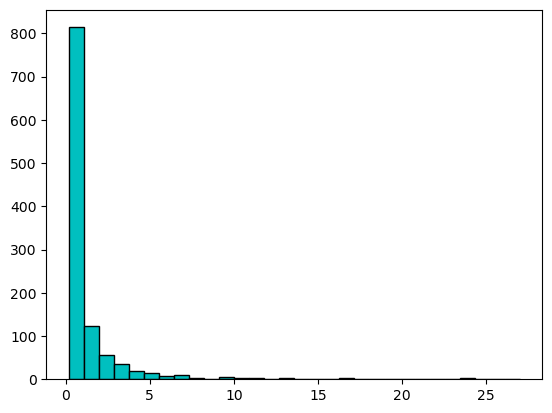

In [19]:
plt.hist(d["o.LBXTHG"], bins=30, color='c', edgecolor='black')

(array([257.,   0.,  74.,  91.,  73.,  71.,  61.,  58.,  63.,  47.,  51.,
         37.,  23.,  32.,  23.,  28.,  25.,  16.,  15.,  14.,   9.,  11.,
          2.,   7.,   4.,   5.,   3.,   2.,   1.,   4.]),
 array([-1.60943791, -1.4459411 , -1.28244429, -1.11894748, -0.95545067,
        -0.79195386, -0.62845704, -0.46496023, -0.30146342, -0.13796661,
         0.0255302 ,  0.18902701,  0.35252382,  0.51602063,  0.67951745,
         0.84301426,  1.00651107,  1.17000788,  1.33350469,  1.4970015 ,
         1.66049831,  1.82399513,  1.98749194,  2.15098875,  2.31448556,
         2.47798237,  2.64147918,  2.80497599,  2.9684728 ,  3.13196962,
         3.29546643]),
 <BarContainer object of 30 artists>)

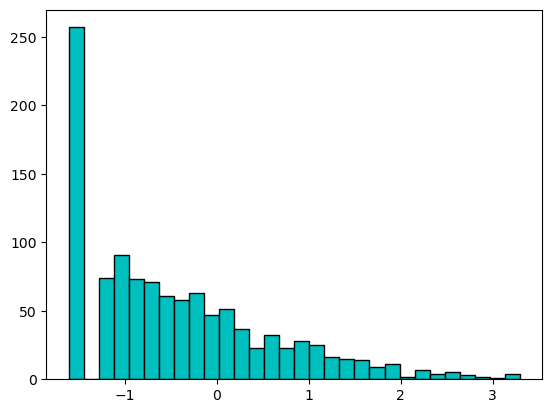

In [20]:
plt.hist(np.log(d["o.LBXTHG"]), bins=30, color='c', edgecolor='black')

# Functions

In [1]:
#%% 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9

from plotnine import *
from glob import glob
from pathlib import Path
import plotnine
import pandas as pd
import numpy as np
from glob import glob

palette = ['#D55E00', #橙红色
           '#E69F00', #橙黄色
           '#0072B2', #深蓝色
           '#009E73', #酸橙绿
           #'#F0E442', #亮黄色
           '#CC79A7', #淡紫色
           '#56B4E9' #天蓝色
           ]
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


In [2]:
def read_file(all_files1, gmm):
  li = []
  for filename in all_files1:
      df = pd.read_csv(filename, index_col=None, header=0)
      li.append(df)
  # 删除li中每个df的第一列
  for i in range(len(li)):
      li[i] = li[i].drop(li[i].columns[0], axis=1)
  # 分别给li中的每一个df增加新列
  # 新列名称叫group_cat，若为li的第一个元素则为trial1
  # 若为li的第二个元素则为trial2，以此类推
  for i in range(len(li)):
      li[i]['group_cat'] = 'trial' + str(i+1)
  # 将li中的每个df按照列纵向合并成一个df
  li = pd.concat(li, axis=0, ignore_index=True)
  # 增加一列cover,若lower到upper包含0，则为1，否则为0
  li['cover'] = np.where((li['mean_low'] <= 0) & (li['mean_high'] >= 0), 1, 0)
  # 增加一列gmm为1
  li['gmm'] = gmm

  return li

def process_for_plot(path, alpha, gmm1, gmm2, gmm3, nplot, rr):
  path1 = path + 'alpha_' + str(alpha) + '_gmm_' + str(gmm1) + '/'
  path2 = path + 'alpha_' + str(alpha) + '_gmm_' + str(gmm2) + '/'
  path3 = path + 'alpha_' + str(alpha) + '_gmm_' + str(gmm3) + '/'
  
  all_files1 = glob(path1 + "*.csv")
  all_files2 = glob(path2 + "*.csv")
  all_files3 = glob(path3 + "*.csv")

  li = read_file(all_files1, gmm1)
  li2 = read_file(all_files2, gmm2)
  li3 = read_file(all_files3, gmm3)

  groups = np.unique(li.group_cat)
  xpos = []
  labelpos = np.arange(len(groups))*rr*2
  for r in labelpos:
      xpos.extend(list(np.linspace(r-(rr-1), r+(rr-1), num=nplot)))

  li = li.groupby(['group_cat'], sort=False) \
          .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
          .reset_index(drop=True)
  li['cover'] = pd.Categorical(li['cover'],categories=[1,0])
  li['xpos'] = np.array(xpos)
  #li = li.round(1)
  
  # 对li2执行相同的操作
  li2 = li2.groupby(['group_cat'], sort=False) \
          .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
          .reset_index(drop=True)
  li2['cover'] = pd.Categorical(li2['cover'],categories=[1,0])
  li2['xpos'] = np.array(xpos)
  
  # 对li3执行相同的操作
  li3 = li3.groupby(['group_cat'], sort=False) \
          .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
          .reset_index(drop=True)
  li3['cover'] = pd.Categorical(li3['cover'],categories=[1,0])
  li3['xpos'] = np.array(xpos)
  
  # 将li和li2和li3合并
  li = pd.concat([li, li2, li3], axis=0, ignore_index=True)
  
  return li,labelpos

In [3]:
# # 循环读取文件夹下所有csv文件
# path = r'../results/ITE/VD-log2/'
# path1 = path+'alpha_0.2_gmm_1/'
# path2 = path+'alpha_0.2_gmm_2/'
# path3 = path+'alpha_0.2_gmm_3/'

# all_files1 = glob(path1 + "*.csv")
# all_files2 = glob(path2 + "*.csv")
# all_files3 = glob(path3 + "*.csv")

# li = []
# for filename in all_files1:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)
# # 删除li中每个df的第一列
# for i in range(len(li)):
#     li[i] = li[i].drop(li[i].columns[0], axis=1)
# # 分别给li中的每一个df增加新列
# # 新列名称叫group_cat，若为li的第一个元素则为trial1
# # 若为li的第二个元素则为trial2，以此类推
# for i in range(len(li)):
#     li[i]['group_cat'] = 'trial' + str(i+1)
# # 将li中的每个df按照列纵向合并成一个df
# li = pd.concat(li, axis=0, ignore_index=True)
# # 增加一列cover,若lower到upper包含0，则为1，否则为0
# li['cover'] = np.where((li['mean_low'] <= 0) & (li['mean_high'] >= 0), 1, 0)
# # 增加一列gmm为1
# li['gmm'] = 1

# # 继续读取另一个文件夹下的csv文件
# li2 = []
# for filename in all_files2:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li2.append(df)
# # 删除li中每个df的第一列
# for i in range(len(li2)):
#     li2[i] = li2[i].drop(li2[i].columns[0], axis=1)
# # 分别给li中的每一个df增加新列
# # 新列名称叫group_cat，若为li的第一个元素则为trial1
# # 若为li的第二个元素则为trial2，以此类推
# for i in range(len(li2)):
#     li2[i]['group_cat'] = 'trial' + str(i+1)
# # 将li中的每个df按照列纵向合并成一个df
# li2 = pd.concat(li2, axis=0, ignore_index=True)
# # 增加一列cover,若lower到upper包含0，则为1，否则为0
# li2['cover'] = np.where((li2['mean_low'] <= 0) & (li2['mean_high'] >= 0), 1, 0)
# # 增加一列gmm为2
# li2['gmm'] = 2

# # 继续读取另一个文件夹下的csv文件
# li3 = []
# for filename in all_files3:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li3.append(df)
# # 删除li中每个df的第一列
# for i in range(len(li3)):
#     li3[i] = li3[i].drop(li3[i].columns[0], axis=1)
# # 分别给li中的每一个df增加新列
# # 新列名称叫group_cat，若为li的第一个元素则为trial1
# # 若为li的第二个元素则为trial2，以此类推
# for i in range(len(li3)):
#     li3[i]['group_cat'] = 'trial' + str(i+1)
# # 将li中的每个df按照列纵向合并成一个df
# li3 = pd.concat(li3, axis=0, ignore_index=True)
# # 增加一列cover,若lower到upper包含0，则为1，否则为0
# li3['cover'] = np.where((li3['mean_low'] <= 0) & (li3['mean_high'] >= 0), 1, 0)
# # 增加一列gmm为3
# li3['gmm'] = 3

In [4]:
# groups = np.unique(li.group_cat)
# nplot = 15
# rr = 5
# xpos = []
# labelpos = np.arange(len(groups))*rr*2
# for r in labelpos:
#     xpos.extend(list(np.linspace(r-(rr-1), r+(rr-1), num=nplot)))
# li = li.groupby(['group_cat'], sort=False) \
#         .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
#         .reset_index(drop=True)
# li['cover'] = pd.Categorical(li['cover'],categories=[1,0])
# li['xpos'] = np.array(xpos)
# #li = li.round(1)
# # 对li2执行相同的操作
# li2 = li2.groupby(['group_cat'], sort=False) \
#         .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
#         .reset_index(drop=True)
# li2['cover'] = pd.Categorical(li2['cover'],categories=[1,0])
# li2['xpos'] = np.array(xpos)
# # 对li3执行相同的操作
# li3 = li3.groupby(['group_cat'], sort=False) \
#         .apply(lambda x: x.sort_values(['cover'], ascending=False)) \
#         .reset_index(drop=True)
# li3['cover'] = pd.Categorical(li3['cover'],categories=[1,0])
# li3['xpos'] = np.array(xpos)
# # 将li和li2和li3合并
# li = pd.concat([li, li2, li3], axis=0, ignore_index=True)
# li

In [5]:
#####两个gamma的ITE
# p = ggplot(li,aes(x='xpos', color='group_cat',linetype='cover')) + \
#             geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
#                            width=.2, size=0.9) + \
#             labs(x='', y=r'ITE') +\
#             theme(figure_size=(15,8),\
#                subplots_adjust={'right': 0.8},\
#                text = element_text(size=18), \
#                title=element_text(size=18),\
#                legend_position='none',\
#                legend_title = element_blank(),\
#                legend_entry_spacing_y = 20) +\
#             scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
#             scale_linetype_manual(values=['solid','dashed']) +\
#             ylim([-3,5]) +\
#             geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
#             facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# # 根据group_cat列使用不同的颜色
# p = p + scale_color_manual(values=palette)
# # 给图像增加大标题,位于图像中心位置
# p = p + ggtitle('VK Dataset')
# # 调整title字体大小
# p = p + theme(plot_title=element_text(size=30))
# ggplot.draw(p)

# Usage

## VD

In [14]:
VD_log2,labelpos = process_for_plot(r'../results/ITE/VD-log2/', 0.2, 1, 2, 3, 15, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\3686373895.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


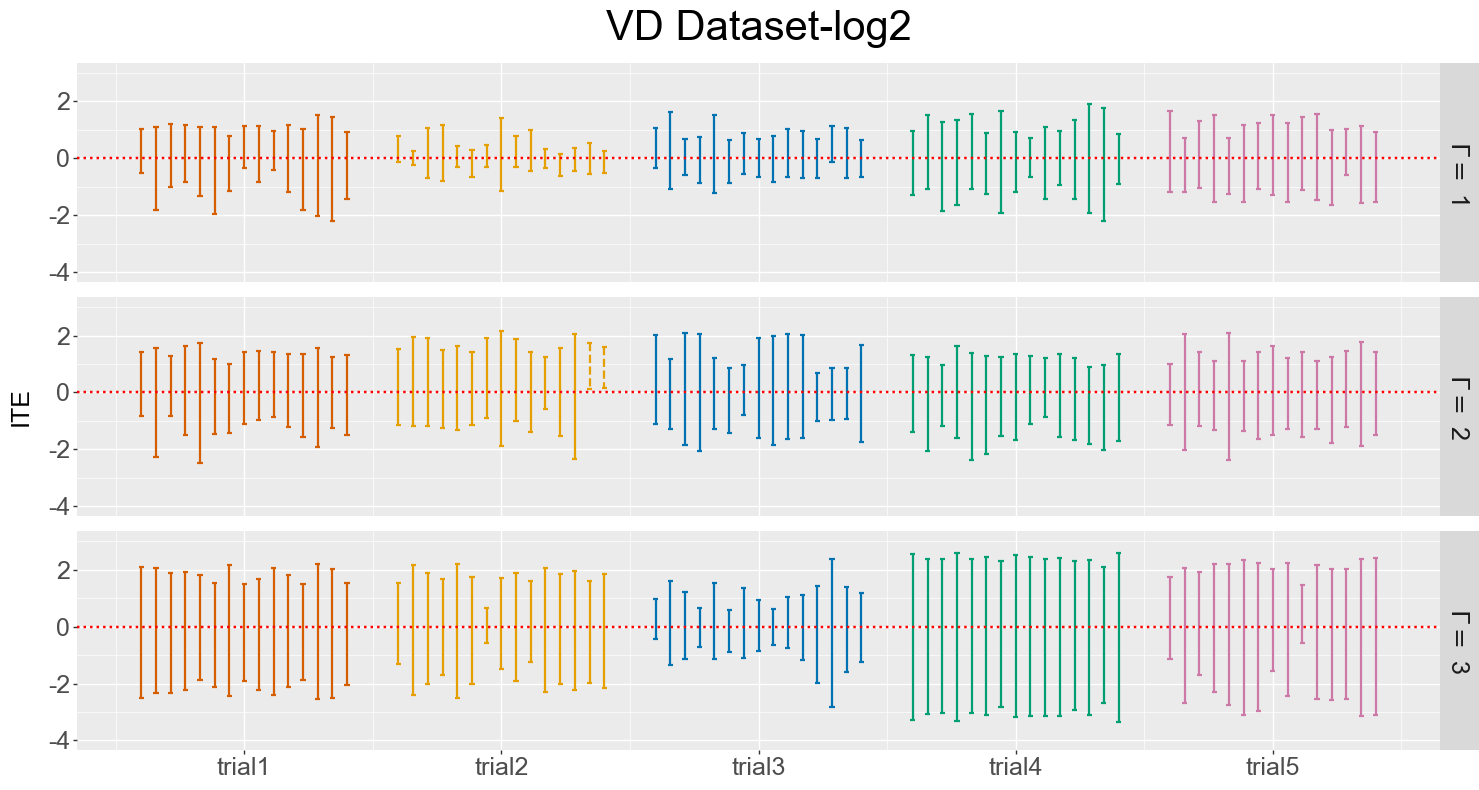

In [16]:
#####三个gamma的ITE
p = ggplot(VD_log2,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-4,3]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VD Dataset-log2')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

In [17]:
VD,labelpos = process_for_plot(r'../results/ITE/VD/', 0.2, 1, 2, 3, 15, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

In [18]:
VD

,mean_low,mean_high,mean_y1_mean,mean_y0_mean,group_cat,cover,gmm,xpos
0,-4.207145,15.944721,10.148008,25.027329,trial1,1,1,-4.000000
1,-9.338659,7.444366,10.148008,25.027329,trial1,1,1,-3.428571
2,-8.516221,16.006447,10.148008,25.027329,trial1,1,1,-2.857143
3,-10.483653,16.168419,10.148008,25.027329,trial1,1,1,-2.285714
4,-8.980019,7.200035,10.148008,25.027329,trial1,1,1,-1.714286
...,...,...,...,...,...,...,...,...
220,-23.676803,23.125492,53.889454,37.362115,trial5,1,3,41.714286
221,-20.731256,20.372925,53.889454,37.362115,trial5,1,3,42.285714
222,-25.251410,22.917865,53.889454,37.362115,trial5,1,3,42.857143
223,-25.035208,23.137521,53.889454,37.362115,trial5,1,3,43.428571


C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\1249574639.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


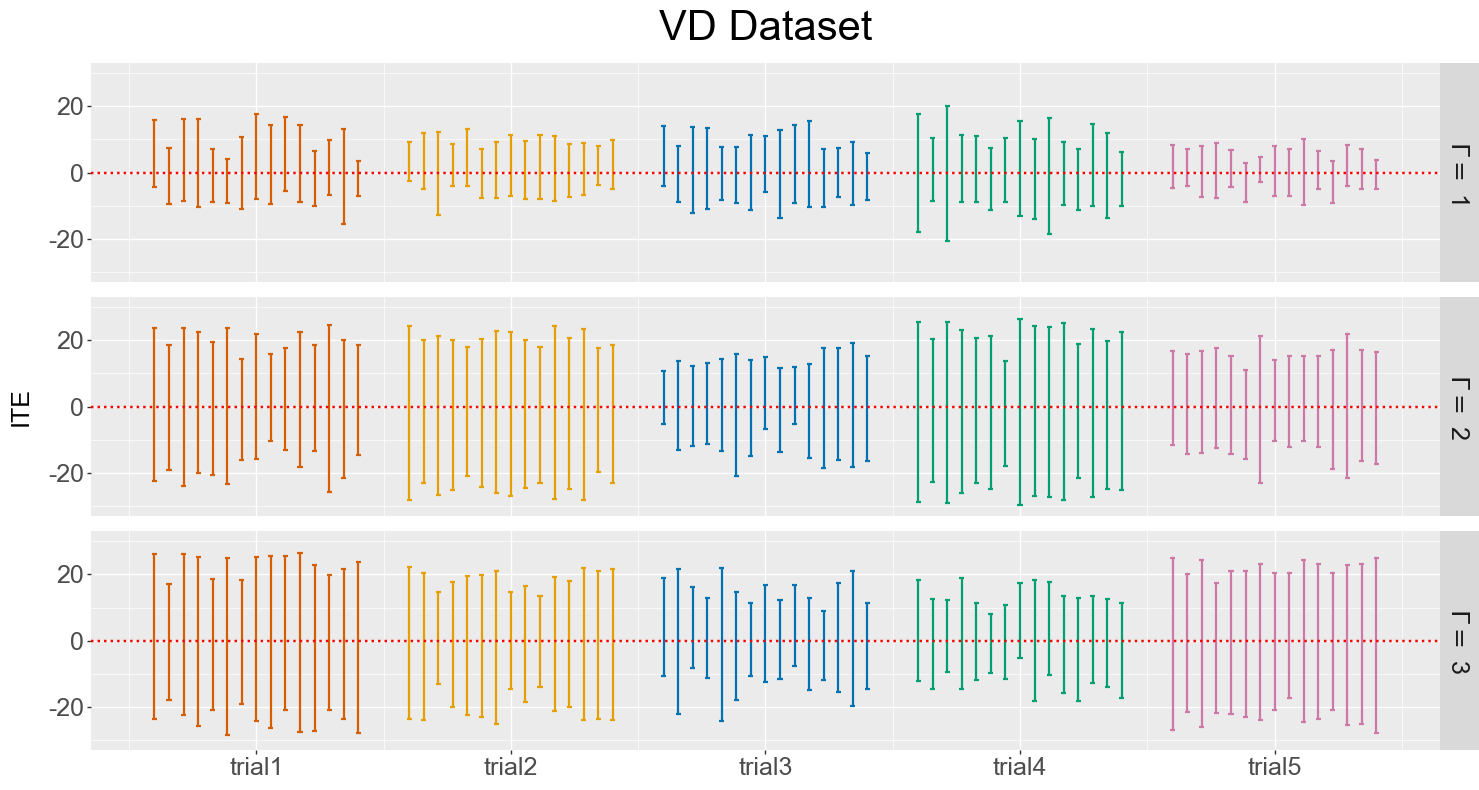

In [19]:
#####三个gamma的ITE
p = ggplot(VD,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-30,30]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VD Dataset')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

## VK

In [20]:
VK,labelpos = process_for_plot(r'../results/ITE/VK/', 0.2, 1, 2, 3, 16, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\3123951538.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


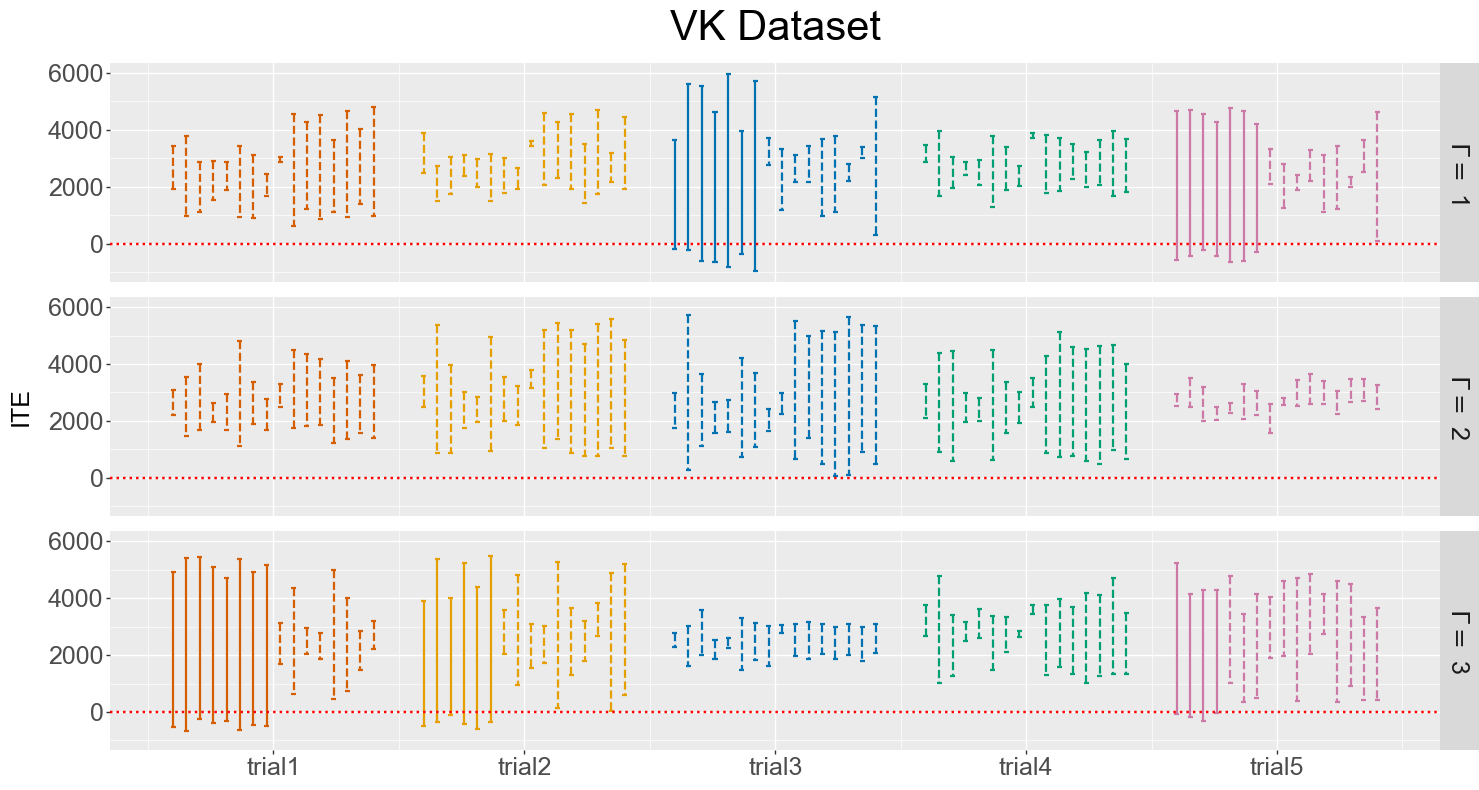

In [21]:
#####三个gamma的ITE
p = ggplot(VK,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-1000,6000]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VK Dataset')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

In [24]:
VK_log2,labelpos = process_for_plot(r'../results/ITE/VK-log2/', 0.2, 1, 2, 3, 16, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_7144\3249440815.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


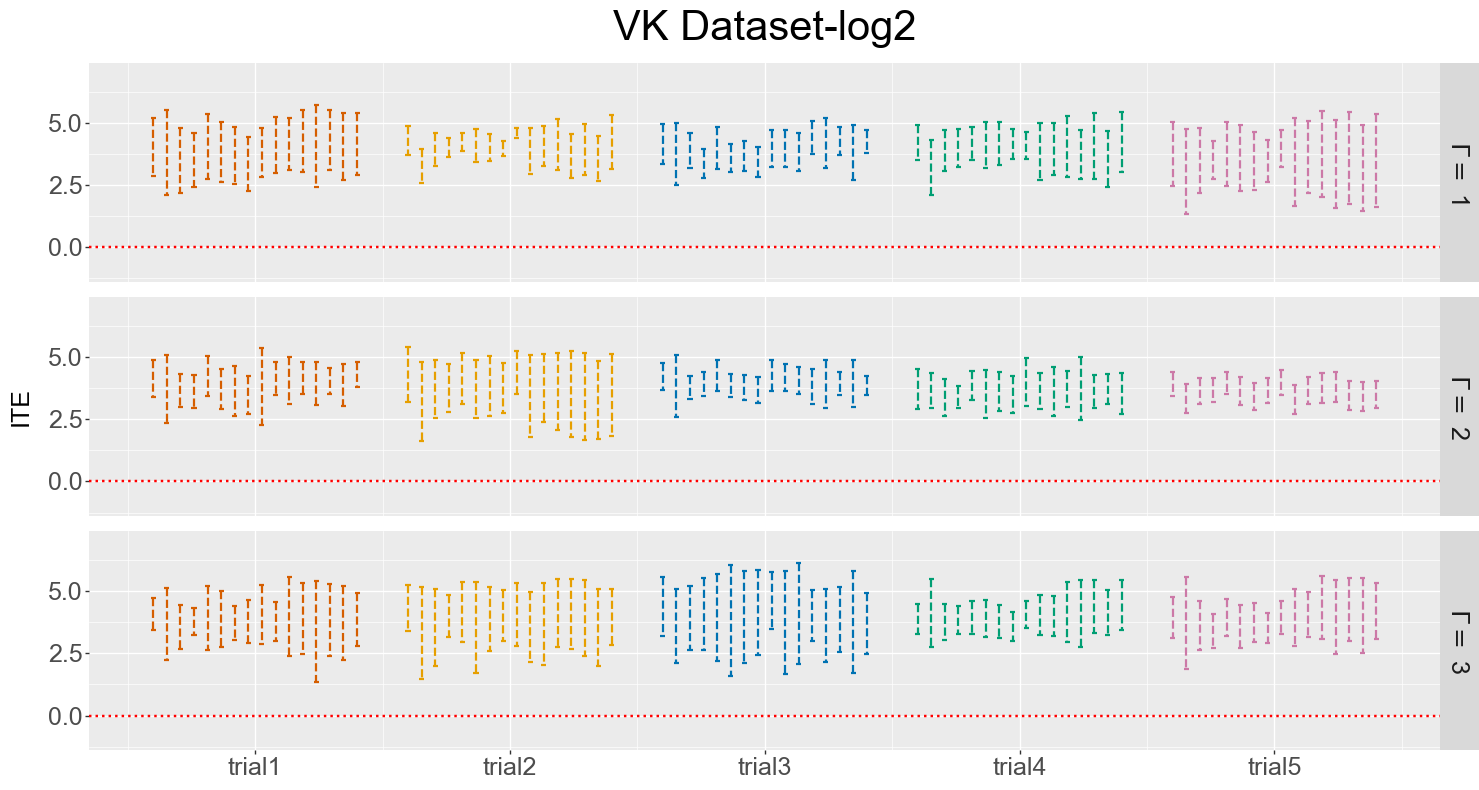

In [25]:
#####三个gamma的ITE
p = ggplot(VK_log2,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-1,7]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VK Dataset-log2')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

## Data1

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_14152\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_14152\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_14152\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a 

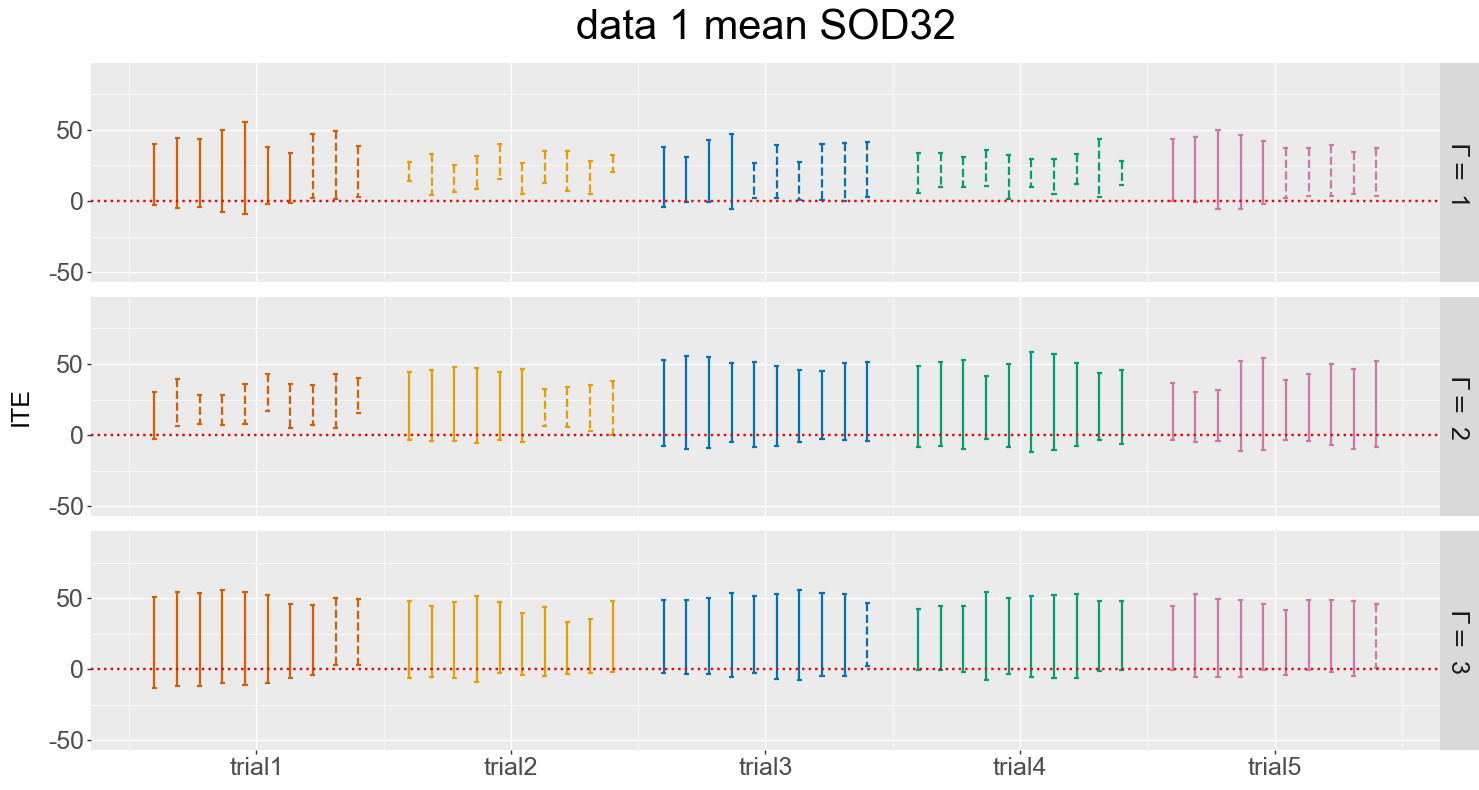

In [7]:
data1,labelpos = process_for_plot(r'../results/ITE/data1-mean/', 0.2, 1, 2, 3, 10, 5)

#####三个gamma的ITE
p = ggplot(data1,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-50,90]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('data 1 mean SOD32')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)

## Data 30

In [3]:
data30,labelpos = process_for_plot(r'../results/ITE/data30/', 0.2, 1, 2, 3, 10, 5)

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_21632\814843682.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_21632\814843682.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\EvaSong\AppData\Local\Temp\ipykernel_21632\814843682.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a 

C:\Users\EvaSong\AppData\Local\Temp\ipykernel_21632\2523313093.py:6: FutureWarning: 
Themeable 'legend_entry_spacing_y' has been renamed to 'legend_key_spacing_y'.
'legend_entry_spacing_y' is now deprecated and will be removed in a future release.
d:\python\anaconda\envs\py3.11\Lib\site-packages\plotnine\themes\themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


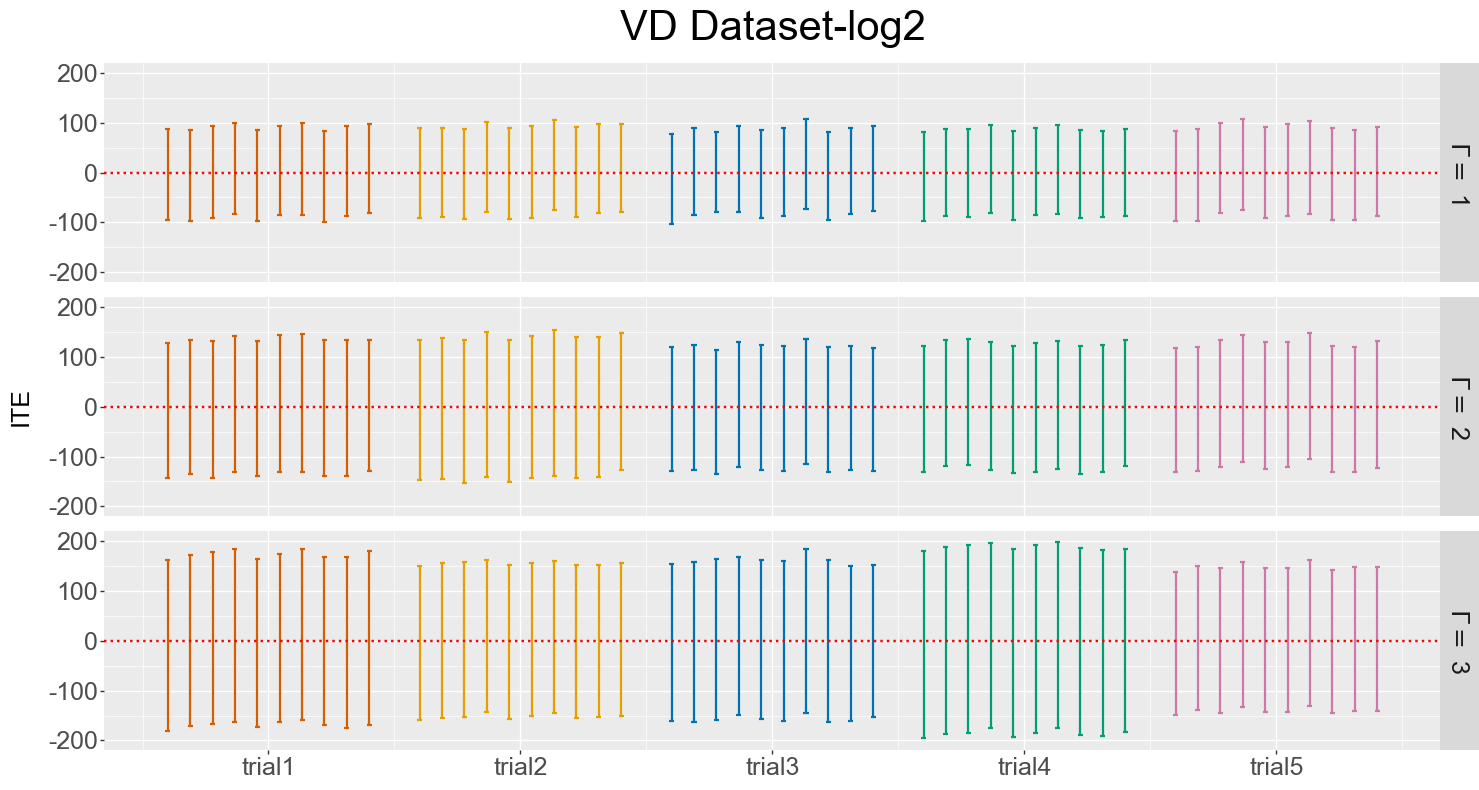

In [4]:
#####三个gamma的ITE
p = ggplot(data30,aes(x='xpos', color='group_cat',linetype='cover')) + \
            geom_errorbar(mapping=aes(ymin='mean_low', ymax='mean_high'), \
                           width=.2, size=0.9) + \
            labs(x='', y=r'ITE') +\
            theme(figure_size=(15,8),\
               subplots_adjust={'right': 0.8},\
               text = element_text(size=18), \
               title=element_text(size=18),\
               legend_position='none',\
               legend_title = element_blank(),\
               legend_entry_spacing_y = 20) +\
            scale_x_continuous(breaks=list(labelpos),labels=['trial1', 'trial2', 'trial3','trial4','trial5']) +\
            scale_linetype_manual(values=['solid','dashed']) +\
            ylim([-200,200]) +\
            geom_hline(yintercept=0,linetype='dotted',size=1,color='red') +\
            facet_grid('gmm ~ .',labeller=labeller(rows=lambda s: r'$\Gamma=$ '+str(s) )) 
# 根据group_cat列使用不同的颜色
p = p + scale_color_manual(values=palette)
# 给图像增加大标题,位于图像中心位置
p = p + ggtitle('VD Dataset-log2')
# 调整title字体大小
p = p + theme(plot_title=element_text(size=30))
ggplot.draw(p)